# MOST COMMON PREDICTION MODELS 
## _WITH PYTHON_  
algorithms predicting _continuous numeric_ values are called __regressions__  
algorithms predicting _categoric_ values are called __classificators__

__Dataset for linear regression__  

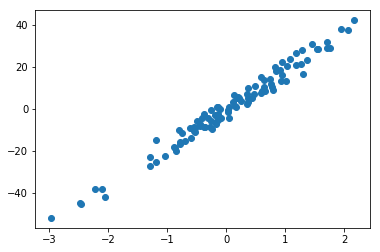

In [6]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
%matplotlib inline

# generate regression dataset
X_data, y_data = make_regression(n_samples=100, n_features=1, noise=3)
# plot regression dataset
X = X_data
y = y_data
plt.scatter(X,y)
plt.show()

## Train-test split:  

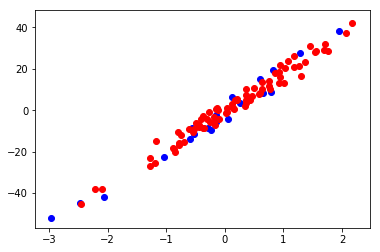

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.8, random_state=1)

# plot regression dataset
plt.scatter(x_train,y_train,c='b')
plt.scatter(x_test,y_test,c='r')
plt.show()

## (MULTIPLE) LINEAR REGRESSION  
[scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Coefficients:  [18.83820832]


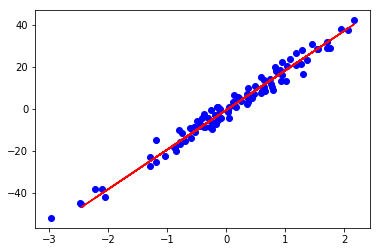

In [16]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

#training model
regr.fit(x_train, y_train)

# For multi-dimensional linear regression:
'''
x_train = np.asanyarray(df_train[['x1','x2',...,'xN']])
y_train = np.asanyarray(df_train[['y']])

x_test = np.asanyarray(df_test[['x1','x2',...,'xN']])
'''
# The coefficients
print ('Coefficients: ', regr.coef_)

# Prediction
y_predict = regr.predict(x_test)

# Visualization
plt.scatter(X_data,y_data,c='b')
plt.plot(x_test,y_predict,c='r')
plt.show()

### _CROSS-VALIDATION_  
Uses different combinations of test-train folds from the whole dataset  
__You can use CROSS-VALIDATION with any model type you want!__

__Documentation:__  
[score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)  
[predictions](https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_predict.html#sphx-glr-auto-examples-model-selection-plot-cv-predict-py)

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

cv = 3 # number of folds, i.e. train-test split is 2:1
model = regr # you can use any other model here

# scores for all folds
print(cross_val_score(model, X_data, y_data, cv=cv)) 

# returns best cross-validated prediction
y_predict = cross_val_predict(model, X_data, y_data, cv=3)
print('data size is {} points, and there\'re {} cross-val predictions'.format(len(y_data), len(y_predict)))

[0.9760866  0.97354613 0.9699904 ]
data size is 100 points, and there're 100 cross-val predictions


## RIDGE REGRESSION
regression which is robust to outliers

[sk-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

## TREE REGRESSION
[sk-learn documentation](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py)

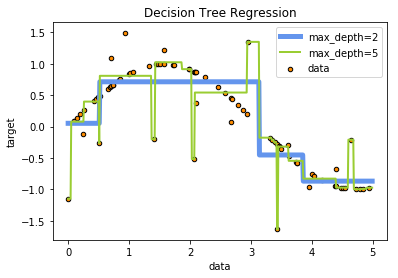

In [18]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random sine-like dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=5)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

## RANDOM FOREST REGRESSOR
A random forest is a meta estimator that fits a number of classifying decision trees  
on various sub-samples of the dataset  
and uses averaging to improve the predictive accuracy and control over-fitting. 

[sc-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

## KNN REGRESSION  
(KNN = 'k nearest neighbours')  
[Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)  
[Algorithm description (Wikipedia)](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)  

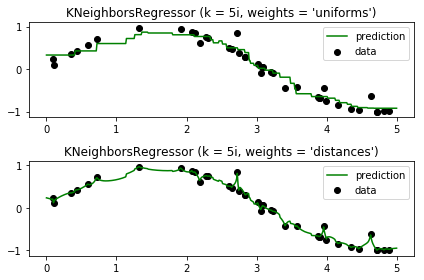

In [19]:
"""
Demonstrate the resolution of a regression problem using a k-Nearest Neighbor 
and the interpolation of the target using both barycenter and constant weights.
"""

# #############################################################################
# Generate sample data
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))
# #############################################################################

# #############################################################################
# Fit regression model
n_neighbours = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbours, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, c='k', label='data')
    plt.plot(T, y_, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = {}i, weights = '{}s')".format(n_neighbours,
                                                                weights))

plt.tight_layout()
plt.show()

## SUPPORT VECTOR REGRESSION (SVR)
[__Theory:__ the idea behind Support Vector Machine (SVM) classificator](https://habr.com/ru/post/105220/)  
[__Theory:__ Support Vector Regression (SVR)](https://www.saedsayad.com/support_vector_machine_reg.htm)  

[sk-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html)

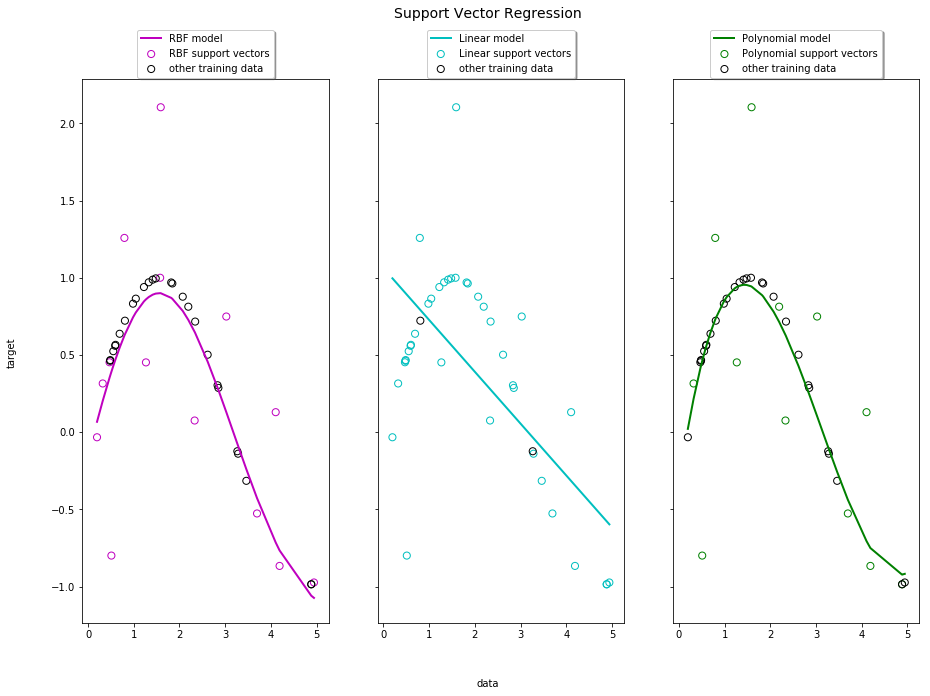

In [20]:
"""
EXAMPLE:
Support Vector Regression using linear and non-linear kernels.

Kernel is a function that divides data into classes 
in higher-dimensional space
"""

import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
'''Generate sample data'''
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# #############################################################################
'''Fit regression model'''

# rbf kernel
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

# linear kernel
svr_lin = SVR(kernel='linear', C=100, gamma='auto') 

# polynomial kernel
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

# #############################################################################
# Look at the results
lw = 2

SVRs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(SVRs):
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(X)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()